原題目：有一位求職者職位為6.5，且宣稱前一份薪資為160000，在錄取前先預測求職者是否前份工作薪資是否屬實（隨機森林預測）

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # For plotting the visualizations
import pandas as pd 
%matplotlib inline

dataset = pd.read_csv('Position_Salaries.csv')

In [2]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# 切分Dataset
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [7]:
#隨機森林回歸樹
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

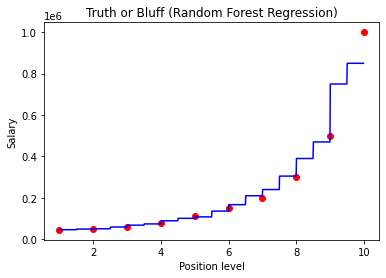

In [8]:
# 回歸結果視覺化
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [9]:
# 預測6.5職等薪資
y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
y_pred

array([167000.])

In [22]:
#嘗試增加更多棵樹n=500,改進模型
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=500,random_state=0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=0)

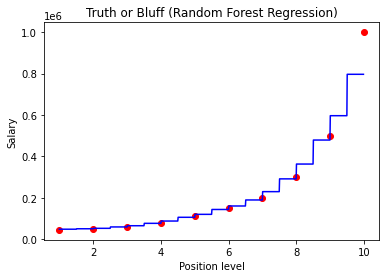

In [23]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [24]:
# Predicting a new result
y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
y_pred

array([160600.])

結論：求職者前份工作薪資正確